## Hold-up tank Model

Using fmdtools to simulate hazards in a system with human-component interactions, including:

- human-induced failure modes
- human responses to component failure modes
- joint human-component failure modes

The system to model is in `tank_model.py`

In [1]:
import sys
sys.path.append('../')

import fmdtools.faultprop as fp
import fmdtools.resultproc as rp
from tank_model import Tank
from fmdtools.modeldef import SampleApproach

### Verifying the nominal state:

In the nominal state, no change in system state should occur and the tank level should remain at 5.

In [2]:
mdl = Tank()
endresults, resgraph, mdlhist = fp.run_nominal(mdl)

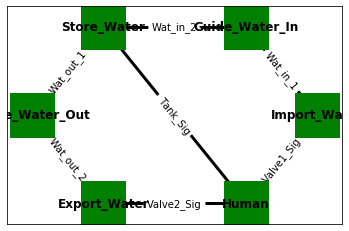

In [3]:
rp.show_graph(resgraph)

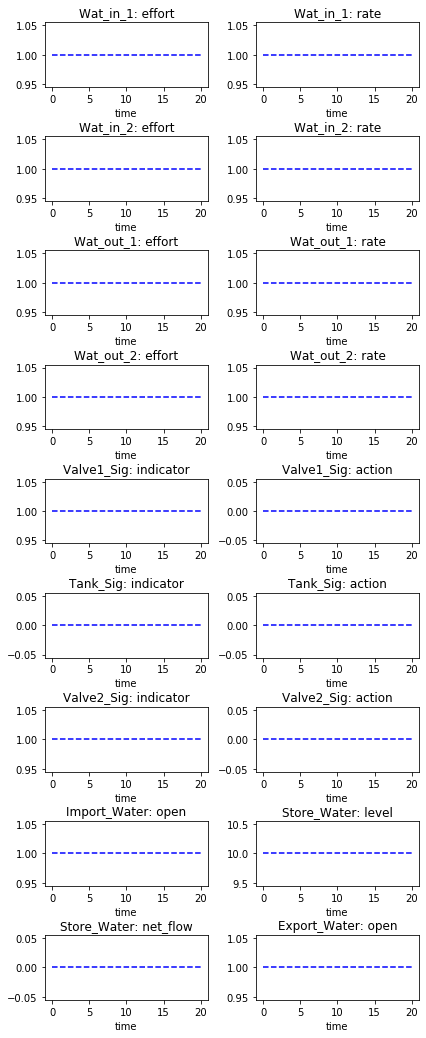

In [4]:
rp.plot_mdlhistvals(mdlhist)

### What happens under component faults?


Here we model a leak of the tank. To compensate for this leak, the operator opens the first valve to a higher setting, maintaining the level of the tank

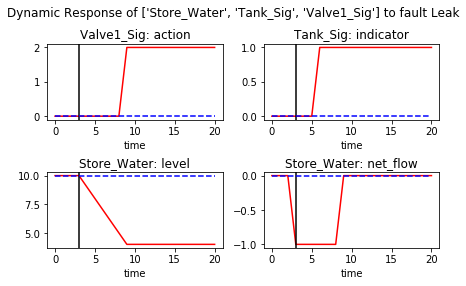

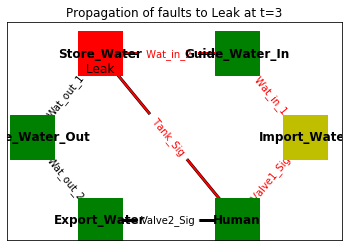

In [5]:
endresults, resgraph, mdlhist = fp.run_one_fault(mdl,'Store_Water','Leak', time=3)

rp.plot_mdlhistvals(mdlhist, fault='Leak', time=3, fxnflowvals={'Store_Water':['level', 'net_flow'], 'Tank_Sig':['indicator'], 'Valve1_Sig':['action']}, legend=False)
rp.show_graph(resgraph,faultscen='Leak', time=3)


### What about human-induced faults?

Here we evaluate what happens if the operator thinks they see a low or high indicator and takes those given actions.

Note that in these cases, because of the indicator/procedures, the operators are able to correct for the fault.

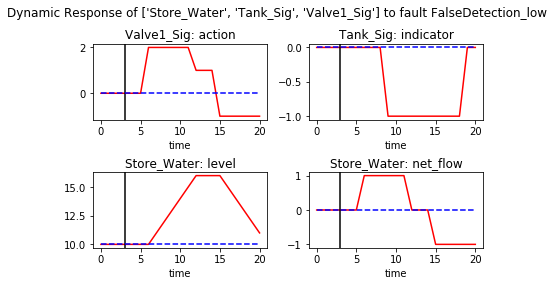

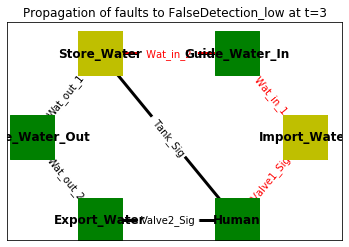

In [6]:
endresults, resgraph, mdlhist = fp.run_one_fault(mdl,'Human','FalseDetection_low', time=3)

rp.plot_mdlhistvals(mdlhist, fault='FalseDetection_low', time=3, fxnflowvals={'Store_Water':['level', 'net_flow'], 'Tank_Sig':['indicator'], 'Valve1_Sig':['action']}, legend=False)
rp.show_graph(resgraph,faultscen='FalseDetection_low', time=3)

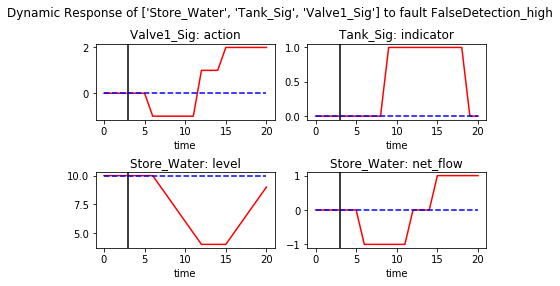

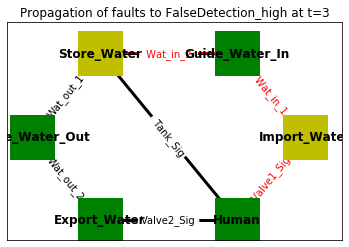

In [7]:
endresults, resgraph, mdlhist = fp.run_one_fault(mdl,'Human','FalseDetection_high', time=3)

rp.plot_mdlhistvals(mdlhist, fault='FalseDetection_high', time=3, fxnflowvals={'Store_Water':['level', 'net_flow'], 'Tank_Sig':['indicator'], 'Valve1_Sig':['action']}, legend=False)
rp.show_graph(resgraph,faultscen='FalseDetection_high', time=3)

### Evaluating Joint Component-Human fault modes 

In [ ]:
#app_full = SampleApproach(mdl)
#endclasses, mdlhists = fp.run_approach(mdl, app_full)

In [9]:
app_joint_faults = SampleApproach(mdl, faults='all', jointfaults={'faults': 2})
endclasses, mdlhists = fp.run_approach(mdl, app_joint_faults)

In [17]:
reshists, diffs, summaries= rp.compare_hists(mdlhists)

In [19]:
fmea_tab = rp.make_fullfmea(endclasses, summaries)
fmea_tab.to_csv('jointrun.csv')

In [14]:
rp.make_simplefmea(endclasses)

,rate,cost,expected cost
"Import_Water Stuck, t=0",8.333333e-07,1.0,1.0
"Guide_Water_In Leak, t=0",8.333333e-07,1.0,1.0
"Guide_Water_In Clogged, t=0",8.333333e-07,1.0,1.0
"Store_Water Leak, t=0",8.333333e-07,1.0,1.0
"Guide_Water_Out Leak, t=0",8.333333e-07,1.0,1.0
...,...,...,...
"Guide_Water_Out: Clogged, Export_Water: Stuck, t=10",2.506905e-10,1.0,1.0
"Guide_Water_Out: Clogged, Human: FalseDetection_low, t=10",2.506726e-09,1.0,1.0
"Guide_Water_Out: Clogged, Human: FalseDetection_high, t=10",2.506726e-09,1.0,1.0
"Export_Water: Stuck, Human: FalseDetection_low, t=10",2.506726e-09,1.0,1.0
